# Justice For Everyone

In [15]:
#1. Extraer codigo
import PyPDF2

with open("raw_data/Reglamento_CDMX.pdf", 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)

    text = ' '
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        text += page.extract_text()




In [29]:
#2. Limpieza del texto
#2.1 Quitar caracteres especiales

from unidecode import unidecode
import re

cleaned_text_without_accents = unidecode(text)
cleaned_text = re.sub(r'[^a-zA-Z0-9\sáéíóúÁÉÍÓÚüÜñÑ]', '', cleaned_text_without_accents)

#2.2 Minuscula

cleaned_text = cleaned_text.lower()
cleaned_text

'  \n titulo  primero  \ndisposiciones  generales  \n \ncapitulo  i \ndel objeto  y conceptos  generales  \n \narticulo  1 el presente  reglamento  tiene por objeto  regular  la circulacion  de peatones  y vehiculos  en la via \npublica  y la seguridad  vial en la ciudad  de mexico  \n \nlas disposiciones de este reglamento son aplicables a peatones ciclistas conductores pasajeros y  \npropietarios  de cualquier  tipo de vehiculo  matriculado  en el pais o el extranjero  y que circule  en el territorio  \nde la ciudad  de mexico  en el presente  ordenamiento  se establecen  las normas  respecto  a sus movimientos  \ny estacionamiento en observancia a lo establecido en las leyes reglamentos acuerdos decretos y  \nnormatividad  local vigente  asi como  las maniobras  de ascenso  y descenso  de pasajeros  o de carga y \ndescarga  de igual forma  determina  las condiciones  legales  y de seguridad  a las que se deben  ajustar  los \nvehiculos  y sus conductores  para su circulacion  y esta

In [30]:
articles = re.split(r' \n \narticulo', cleaned_text)
print(articles)


['  \n titulo  primero  \ndisposiciones  generales  \n \ncapitulo  i \ndel objeto  y conceptos  generales ', '  1 el presente  reglamento  tiene por objeto  regular  la circulacion  de peatones  y vehiculos  en la via \npublica  y la seguridad  vial en la ciudad  de mexico  \n \nlas disposiciones de este reglamento son aplicables a peatones ciclistas conductores pasajeros y  \npropietarios  de cualquier  tipo de vehiculo  matriculado  en el pais o el extranjero  y que circule  en el territorio  \nde la ciudad  de mexico  en el presente  ordenamiento  se establecen  las normas  respecto  a sus movimientos  \ny estacionamiento en observancia a lo establecido en las leyes reglamentos acuerdos decretos y  \nnormatividad  local vigente  asi como  las maniobras  de ascenso  y descenso  de pasajeros  o de carga y \ndescarga  de igual forma  determina  las condiciones  legales  y de seguridad  a las que se deben  ajustar  los \nvehiculos  y sus conductores  para su circulacion  y establece  lo

In [31]:
len(articles)

69

In [ ]:
#3. Tokenizacion
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

word_tokens = word_tokenize(cleaned_text)

In [ ]:
#3.1 Remover palabras insignificantes
from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))
filtered_words = [word for word in word_tokens if word.lower() not in stop_words]

print(filtered_words)

In [ ]:
#3.2Juntar los tokens
#cleaned_text_f = ' '.join(filtered_words)

In [ ]:
#4. Vectorizar
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(filtered_words)
X.toarray()


In [5]:
#5. Estadisticas
#Frecuencia de las palabras
import pandas as pd

count_vectorizer.get_feature_names_out()

vectorized_texts = pd.DataFrame(
    X.toarray(),
    columns = count_vectorizer.get_feature_names_out(),
    index = filtered_words
)

print(vectorized_texts)


               04  075  08  10  100  103  107  10kmh  11  12  ...  xxxii  \
titulo          0    0   0   0    0    0    0      0   0   0  ...      0   
primero         0    0   0   0    0    0    0      0   0   0  ...      0   
disposiciones   0    0   0   0    0    0    0      0   0   0  ...      0   
generales       0    0   0   0    0    0    0      0   0   0  ...      0   
capitulo        0    0   0   0    0    0    0      0   0   0  ...      0   
...            ..  ...  ..  ..  ...  ...  ...    ...  ..  ..  ...    ...   
ilicitos        0    0   0   0    0    0    0      0   0   0  ...      0   
agentes         0    0   0   0    0    0    0      0   0   0  ...      0   
integrantes     0    0   0   0    0    0    0      0   0   0  ...      0   
seguridad       0    0   0   0    0    0    0      0   0   0  ...      0   
ciudadan        0    0   0   0    0    0    0      0   0   0  ...      0   

               xxxiii  xxxiv  xxxix  xxxv  xxxvi  xxxvii  xxxviii  zona  zonas  
titulo

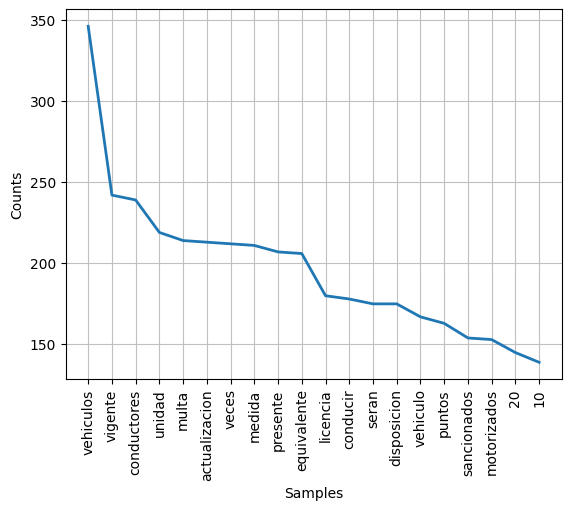

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
#Plot

import matplotlib.pyplot as plt
from nltk import FreqDist

freq_dist = FreqDist(filtered_words)
freq_dist.plot(20, cumulative=False)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiating the TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer()

# Training it on the texts
weighted_words = pd.DataFrame(tf_idf_vectorizer.fit_transform(filtered_words).toarray(),
                 columns = tf_idf_vectorizer.get_feature_names_out())

weighted_words

,04,075,08,10,100,103,107,10kmh,11,12,...,xxxii,xxxiii,xxxiv,xxxix,xxxv,xxxvi,xxxvii,xxxviii,zona,zonas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
import numpy as np
weighted_words_max = np.argmax(weighted_words)
print(weighted_words_max)

2654


In [14]:
count_vectorizer = CountVectorizer(max_df = 0.80)
X = count_vectorizer.fit_transform(filtered_words)
X = pd.DataFrame(
    X.toarray(),
     columns = count_vectorizer.get_feature_names_out(),
     index = filtered_words
)

X

,04,075,08,10,100,103,107,10kmh,11,12,...,xxxii,xxxiii,xxxiv,xxxix,xxxv,xxxvi,xxxvii,xxxviii,zona,zonas
titulo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
primero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
disposiciones,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
generales,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
capitulo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ilicitos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agentes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
integrantes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
seguridad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
